In [4]:
import time
from opensg.mesh.segment import  ShellBounMesh
import opensg.utils.shell as utils

tic = time.time()
segid=9
mesh_yaml = '../data/Shell_1DSG/1D_v8/1Dshell_'+str(segid)+'.yaml'
segment_mesh = ShellBounMesh(mesh_yaml)
meshdata=segment_mesh.meshdata

ABD, mass = segment_mesh.compute_ABD() # MSG based ABD matrix
print('ABD time',str(time.time()-tic))

# Timoshenko stiffness and mass amtrix
Deff_srt= segment_mesh.compute_timo(ABD)[0]
mass=utils.get_mass_shell(meshdata, mass)

print('Origin:', meshdata['origin'],'\n')
print('\n 1D Mass matrix\n', mass)
print('\n 1D Timo matrix\n ', Deff_srt)
print('\n Time Taken:',str(time.time()-tic),'sec')

ABD time 7.205617427825928
Origin: 31.034482759 


 1D Mass matrix
 [[394.0573   0.       0.       0.      24.8557 -19.7935]
 [  0.     394.0573   0.     -24.8557   0.       0.    ]
 [  0.       0.     394.0573  19.7935   0.       0.    ]
 [  0.     -24.8557  19.7935 690.7359   0.       0.    ]
 [ 24.8557   0.       0.       0.      76.5729  64.7656]
 [-19.7935   0.       0.       0.      64.7656 614.1631]]

 1D Timo matrix
  [[ 1.4025e+10 -7.5568e+04  4.3110e+03 -6.9500e+02 -1.0160e+07 -4.5859e+09]
 [-7.5568e+04  6.9557e+08 -6.5978e+07 -4.6634e+07 -2.0600e+03 -7.4709e+04]
 [ 4.3110e+03 -6.5978e+07  2.0434e+08  1.4338e+08  7.7519e+05 -4.3910e+03]
 [-6.9600e+02 -4.6634e+07  1.4338e+08  4.9196e+08  4.3743e+05 -6.8760e+03]
 [-1.0160e+07 -2.0600e+03  7.7519e+05  4.3743e+05  3.4497e+09  1.0578e+09]
 [-4.5859e+09 -7.4709e+04 -4.3910e+03 -6.8790e+03  1.0578e+09  1.1981e+10]]

 Time Taken: 11.195585489273071 sec


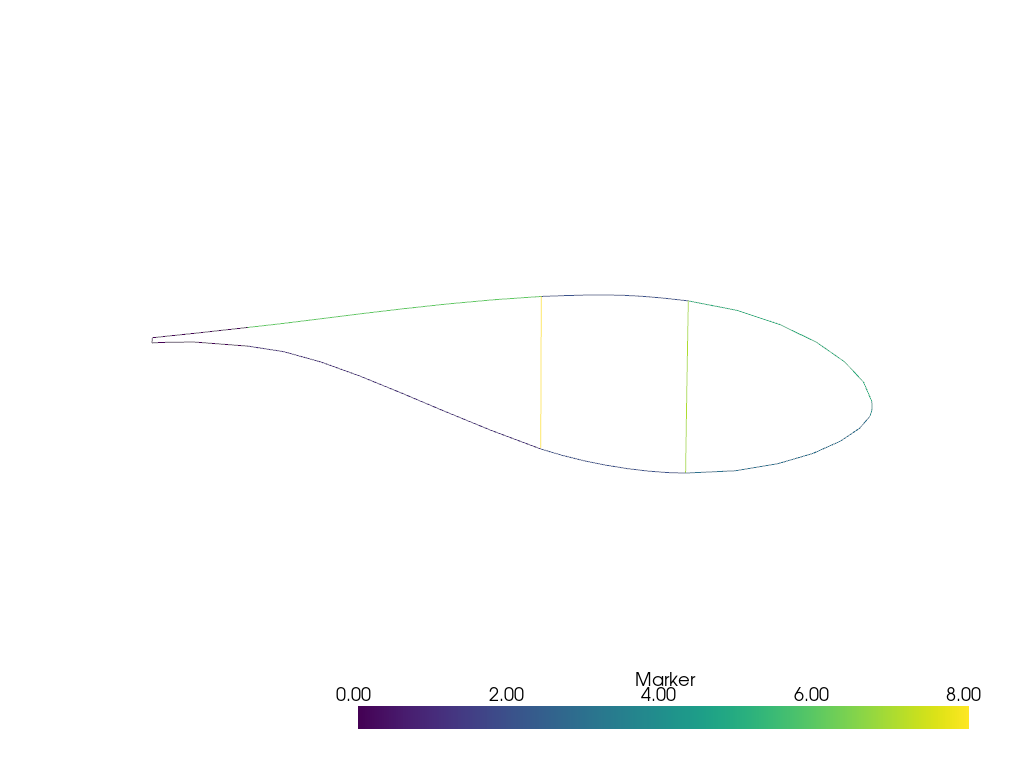

In [2]:
# Visualize plot
import dolfinx
import pyvista
pyvista.start_xvfb()
u_topology, u_cell_types, u_geometry=dolfinx.plot.vtk_mesh(meshdata['mesh'],meshdata['mesh'].topology.dim)
grid = pyvista.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
grid.cell_data["Marker"] = meshdata['subdomains'].values[:]
grid.set_active_scalars("Marker")
u_plotter = pyvista.Plotter()
u_plotter.add_mesh(grid)
u_plotter.view_yz() # x is beam axis
u_plotter.show()